In [4]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [6]:
bos_hou = load_boston()

column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIS'>

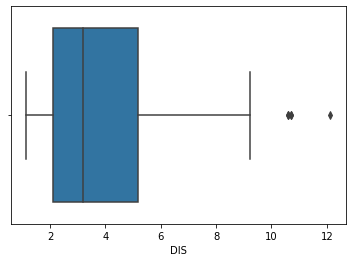

In [9]:
sns.boxplot(df_boston['DIS'])

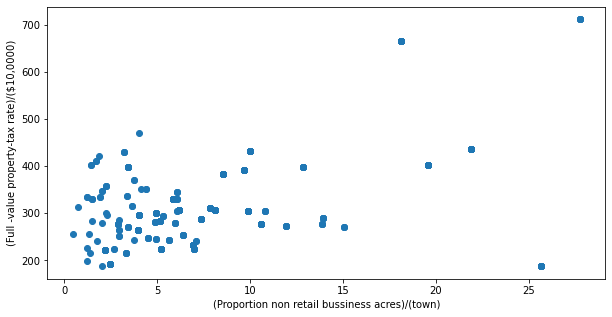

In [15]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df_boston['INDUS'], df_boston['TAX'])
ax.set_xlabel('(Proportion non retail bussiness acres)/(town)')

ax.set_ylabel('(Full -value property-tax rate)/($10,0000)')
plt.show()

In [17]:
print(np.where((df_boston['INDUS']>20) & (df_boston['TAX']>600)))

(array([488, 489, 490, 491, 492], dtype=int64),)


In [19]:
z = np.abs(stats.zscore(df_boston['DIS']))
print(z)

0      0.140214
1      0.557160
2      0.557160
3      1.077737
4      1.077737
         ...   
501    0.625796
502    0.716639
503    0.773684
504    0.668437
505    0.613246
Name: DIS, Length: 506, dtype: float64


In [21]:
threshold =3
print(np.where(z>3))

(array([351, 352, 353, 354, 355], dtype=int64),)


In [23]:
Q1 = np.percentile(df_boston['DIS'], 25,
interpolation = 'midpoint')
Q3 = np.percentile(df_boston['DIS'], 75,
interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", df_boston.shape)
# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
print("New Shape: ", df_boston.shape)

Old Shape:  (506, 13)
New Shape:  (501, 13)
